In [1]:
import infer.pre_infer as pre_infer
import infer.post_infer as post_infer
import infer.dls_infer as dlsinfer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import emcee


In [2]:
# parameters
m = 20
c = 1
eta = 1e-3
angle = np.pi/2
n = 1.33
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1
start = 5e-10
stop = 1e-8
r = 2.2439608235145855e-09
sigma = 2e-10

In [3]:
right_mean = r*2 + 3e-9
left_mean = r*2 - 3e-9


In [4]:
def get_log_time():
    return np.logspace(-4, -1, num=200, base=10)*0.001

In [5]:
def get_distance(start, stop, m):
    return np.linspace(start, stop, m)

In [6]:
def get_gamma(eta, n, angle, k_b, t, lambda_0):
    return pre_infer.calc_gamma(eta, n, angle, k_b, t, lambda_0)

In [7]:
sigma1 = sigma/3

In [8]:
d = get_distance(start, stop, m)

In [9]:
f = pre_infer.generate_bimodal_distribution(d, left_mean, sigma1, right_mean, sigma1, c)

In [13]:
SMALL_SIZE = 11
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



In [ ]:
plt.rc('font', family='serif')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(d, f)
ax.set_ylabel('Probability')
ax.set_xlabel('Particle size (m)')

In [10]:
theta_input = np.append(f, beta)

gamma = get_gamma(eta, n, angle, k_b, t, lambda_0)
time = get_log_time()

In [ ]:
sim_data = dlsinfer.g2(theta_input, d, gamma, time)

In [ ]:
plt.rc('font', family='serif')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
plt.semilogx(time, sim_data)
ax.set_ylabel('Autocorrelation function')
ax.set_xlabel('Time (s)')

In [ ]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [ ]:
start_pos = [theta_input + 1e-4*np.absolute(np.random.randn(ndim)) for i in range(nwalkers)]



In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dlsinfer.log_posterior, args=(d, sim_data, m, gamma, time))


In [ ]:
result = sampler.run_mcmc(start_pos, nsteps)

In [ ]:
sampler.acceptance_fraction

In [ ]:
chained_sampler = post_infer.chain(sampler, 900, ndim)
samples_df = post_infer.create_dataframe(chained_sampler, ndim)
q = samples_df.quantile([0.5], axis=0)
q

In [ ]:
inferred = post_infer.get_infer_f(q, m)
inferred

In [ ]:
plt.rc('font', family='serif')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

plt.plot(d, inferred, '--', label='Inferred')
plt.plot(d, f, label='Simulated')
plt.legend()

ax.set_ylabel("Probability")
ax.set_xlabel("Particle size (m)")

In [19]:
sigma2 = sigma*5

f_wide = pre_infer.generate_distribution(d, right_mean, sigma2, 1)
#plt.plot(d, f_wide)

Text(0.5,0,'Particle size (m)')

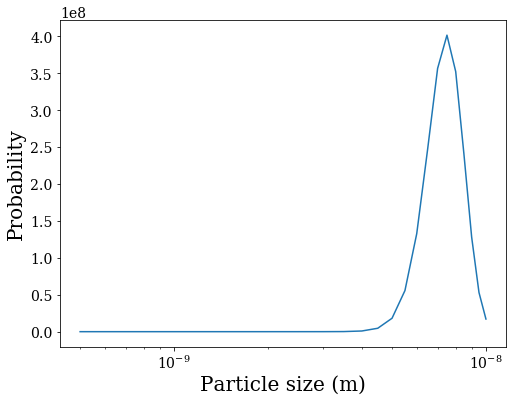

In [20]:
plt.rc('font', family='serif')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
plt.semilogx(d, f_wide)
ax.set_ylabel('Probability')
ax.set_xlabel('Particle size (m)')